In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

COLUMNS_NOTAS = ['name']
COLUMNS_INSCRITOS = ['name', 'cidade', 'sabe programar', 'escolaridade']

def organize_notas(df):
    df.columns =df.iloc[1] 

    notas =df.loc[2:, COLUMNS_NOTAS]
    notas.columns = COLUMNS_NOTAS
    notas = notas.reset_index(drop=True)

    return notas

notas_bruto_v = pd.read_csv("notas_vespertino.csv")
notas_bruto_m = pd.read_csv("notas_matutino.csv")
inscritos_bruto = pd.read_csv("inscritos.csv")

notas_m = organize_notas(notas_bruto_m)
notas_v = organize_notas(notas_bruto_v)

notas = pd.concat([notas_m, notas_v], ignore_index=True)

inscritos = inscritos_bruto.loc[:, COLUMNS_INSCRITOS]

inscritos.name = inscritos.name.str.lower()
notas.name = notas.name.str.lower()
notas_m.name = notas_m.name.str.lower()
notas_v.name = notas_v.name.str.lower()

geral = pd.merge(notas, inscritos, left_on='name', right_on='name')
matutino = pd.merge(notas_m, inscritos, left_on='name', right_on='name')
vespertino = pd.merge(notas_v, inscritos, left_on='name', right_on='name')

#not_merged = notas_m.loc[~notas_m.name.isin(matutino.name)]

geral


,name,cidade,sabe programar,escolaridade
0,laísa chaves de araujo,Serra,False,3° ano (Ensino Médio)
1,miguel de oliveira miranda pedrazzi,Guarapari,True,2° ano (Ensino Médio)
2,irian santana de jesus,Guarapari,True,2° ano (Ensino Médio)
3,maria luísa silva pizzol,Cariacica,False,1° ano (Ensino Médio)
4,enzo klippel,Domingos Martins,True,3° ano (Ensino Médio)
...,...,...,...,...
85,alex da rocha silva,Cariacica,False,Ensino médio completo até 2023
86,alexandre paganini marques,Guarapari,True,1° ano (Ensino Médio)
87,arthur oliveira dos santos,Vila Velha,True,3° ano (Ensino Médio)
88,beatriz barreto buzatto,Vitória,True,3° ano (Ensino Médio)


sabe programar
False    60
True     30
Name: count, dtype: int64


<Axes: ylabel='sabe programar'>

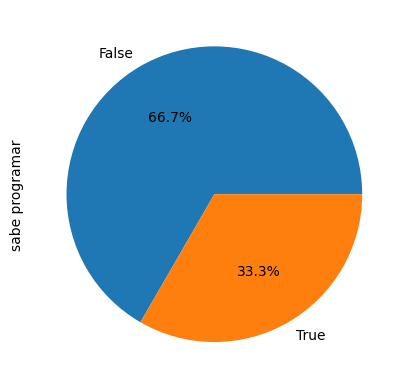

In [13]:
#Sabe programar

analise = geral['sabe programar'].value_counts()
print(analise)

analise.name = 'sabe programar'
analise.plot.pie(autopct='%1.1f%%')

cidade
Vitória             25
Serra               22
Vila Velha          17
Cariacica           16
Guarapari            6
Domingos Martins     3
Viana                1
Name: count, dtype: int64


<Axes: ylabel='count'>

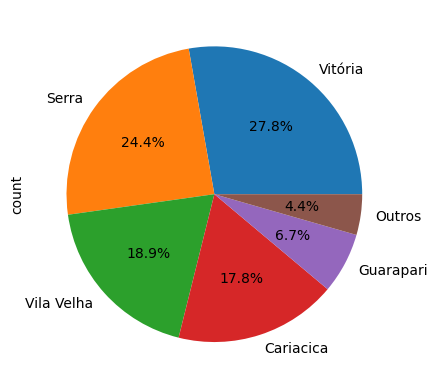

In [9]:
#Cidade

analise = geral.cidade.value_counts()
print(analise)

count = 0
for i, v in analise.items():
    if v < 5:
        count += v
        analise.pop(i)

analise["Outros"] = count

analise.plot.pie(autopct='%1.1f%%')


escolaridade
3° ano (Ensino Médio)             39
2° ano (Ensino Médio)             21
1° ano (Ensino Médio)             18
Ensino médio completo até 2023     7
4° ano (Ensino Médio)              2
Ensino médio completo até 2022     2
EJA (Ensino médio)                 1
Name: count, dtype: int64


<Axes: ylabel='escolaridade'>

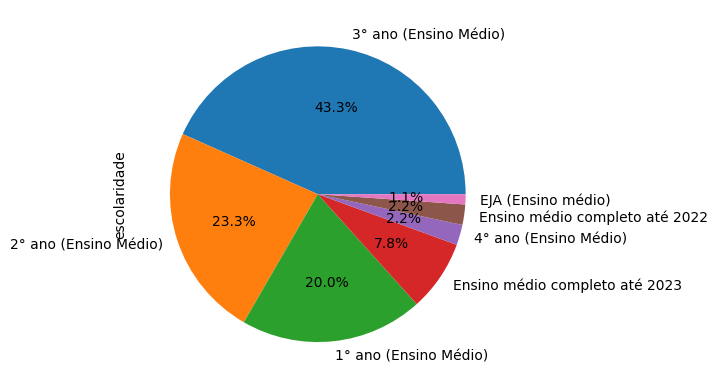

In [16]:
analise = geral['escolaridade'].value_counts()
print(analise)

analise.name = 'escolaridade'
analise.plot.pie(autopct='%1.1f%%')